In [7]:
#  IMPORTING THE IMPORTANT LIBRARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [8]:
# LOAD THE DATA SET
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# Disply some Information of Data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Checking Null Values in Data set
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Disply statiscs of Dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


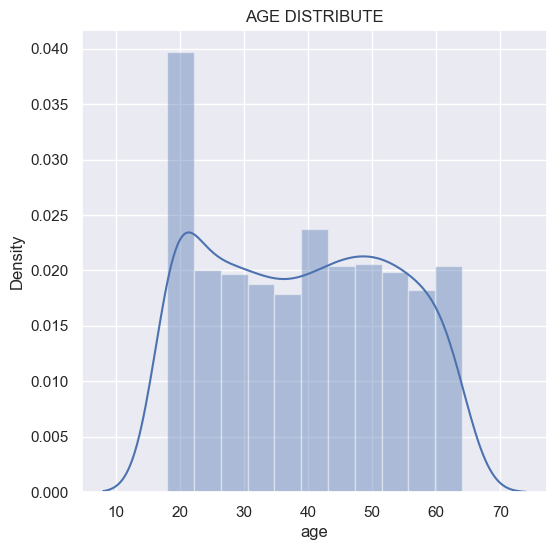

In [12]:
# PLOTING DISTPLOT WITH AGE COLUMN
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('AGE DISTRIBUTE')
plt.show()

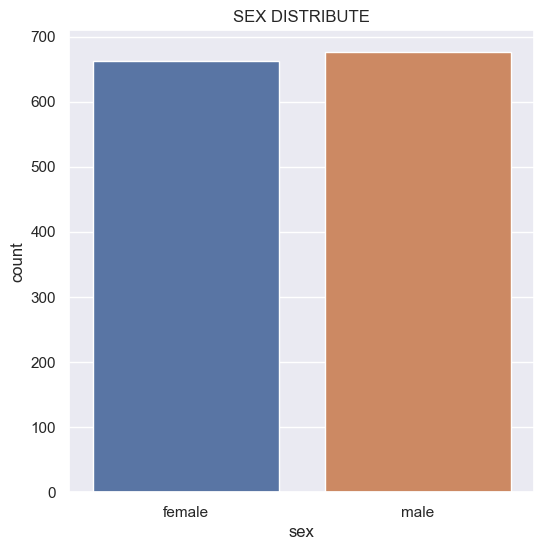

In [13]:
# PLOTING COUNTPLOT WITH SEX COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('SEX DISTRIBUTE')
plt.show()

In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

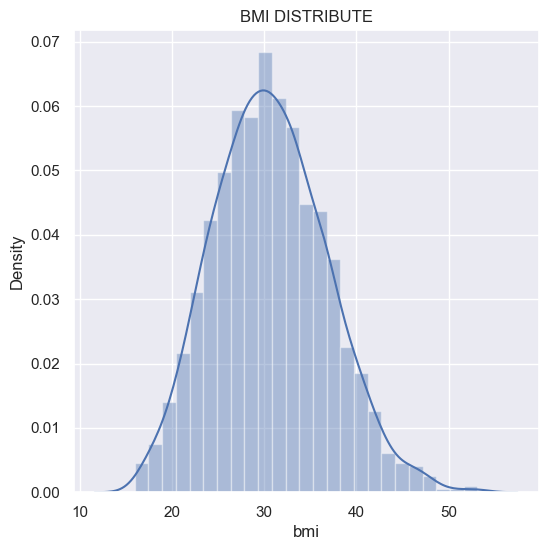

In [15]:
# PLOTING DISTPLOT WITH BMI COLUMN
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI DISTRIBUTE')
plt.show

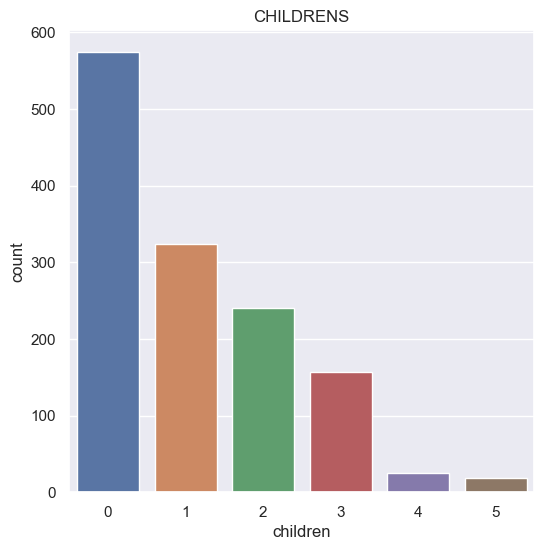

In [16]:
# PLOTING COUNTPLOT WITH CHILDREN COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('CHILDRENS')
plt.show()

In [19]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

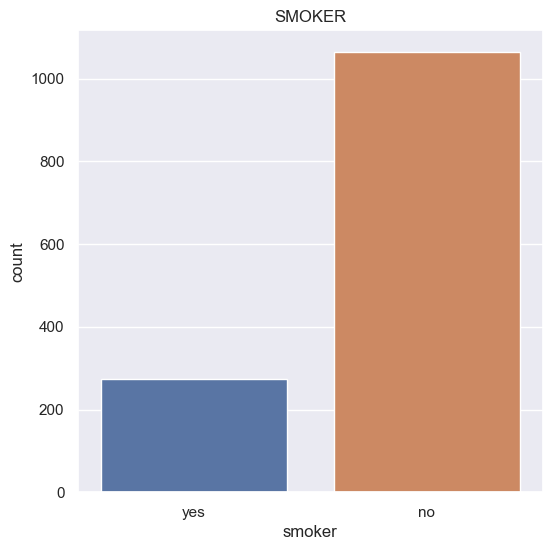

In [20]:
# PLOTING COUNTPLOT WITH SMOKER COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('SMOKER')
plt.show()

In [22]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

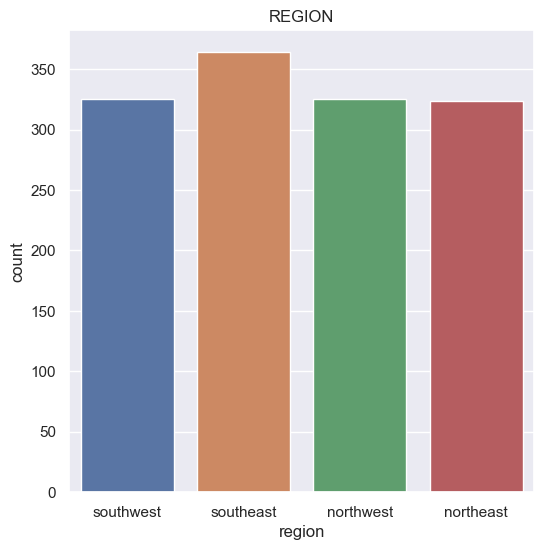

In [23]:
# PLOTING COUNTPLOT WITH REGION  COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('REGION')
plt.show()

In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

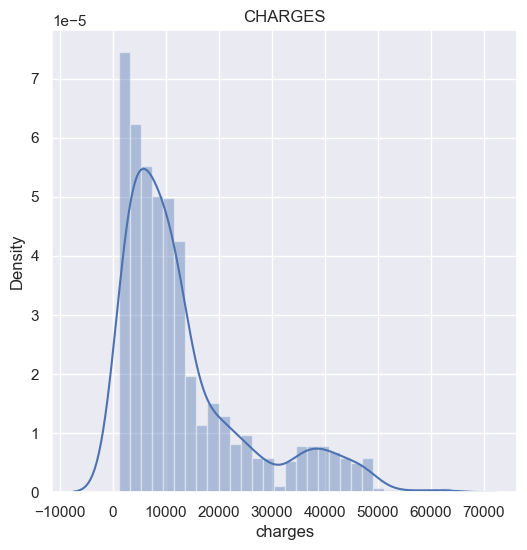

In [26]:
# PLOTING DISTPLOT WITH CHARGES COLUMN
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('CHARGES')
plt.show()

# DATA PREPROCESSING 

### ENCODING THE CATEGORICAL FEATURES

In [27]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [29]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [30]:
df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### SEPRATING THE LABEL & FEATURES 

In [33]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [34]:
print (X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [35]:
print (Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### SPLITING DATA INTO TRAIN TEST & SPLIT

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
# CHEAKING SHAPE OF SPLIT DATA
print (X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
# LOADING THE MODEL
regressor = LinearRegression()

In [39]:
# FITTING MODEL ON DATA SET
regressor.fit(X_train, Y_train)

LinearRegression()

In [40]:
train_data_predict = regressor.predict (X_train)

In [41]:
# EVALUATION MODEL 
r2_train = metrics.r2_score (Y_train,train_data_predict )
print ('R SCORE :',r2_train)

R SCORE : 0.7518195459072953


In [42]:
test_data_predict = regressor.predict (X_test)

In [43]:
r2_test = metrics.r2_score (Y_test,test_data_predict )
print ('R SCORE :', r2_test)

R SCORE : 0.7454471618659975


In [53]:
# SAVING MODEL 
import pickle 
filename = 'Medical_Insurance_Cost.pk1'
pickle.dump (train_data_predict, open(filename, 'wb'))